# BitFEAR: Time Series Analysis

Experimental analysis and learning using:

* Tweets containing #bitcoin, with Vader sentiment scores
* Tweet volume for #bitcoin
* Google Trends data
* Deribit Bitcoin Options orderbook data
* Bitcoin price data

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
plt.rcParams["figure.figsize"] = (16, 10)

### Getting tweets from Google Cloud Storage

In [ ]:
from google.cloud import firestore

In [14]:
db = firestore.Client()
tweets_ref = db.collection('tweet_data_#bitcoin')
tweets = list()
for doc in tweets_ref.stream():
    tweets.append(doc.to_dict())

In [15]:
tweets_df = pd.DataFrame(tweets)

In [16]:
tweets_df.head()

,sentiment_rating,created,tweet_id,text,sentiment_scores,text_clean,user_id
0,0,2020-03-09 19:43:06+00:00,1237101627925987329,"Ooh, a double-whammy buy signal day.","{'neu': 1.0, 'pos': 0.0, 'neg': 0.0, 'compound...","Ooh, a double-whammy buy signal day.",116270443
1,1,2020-03-09 19:43:20+00:00,1237101685757087744,The latest The Crypto Currency Daily! https://...,"{'compound': 0.4926, 'neu': 0.738, 'pos': 0.26...",The latest The Crypto Currency Daily! Thanks ...,2372242398
2,1,2020-03-09 19:43:26+00:00,1237101710935392256,The latest The Blockchain Daily! https://t.co/...,"{'neu': 0.715, 'pos': 0.285, 'neg': 0.0, 'comp...",The latest The Blockchain Daily! Thanks to ...,1075804135524585473
3,0,2020-03-09 19:43:30+00:00,1237101728488718336,Call me oracle kek $BTC #Bitcoin https://t.co/...,"{'pos': 0.0, 'neg': 0.0, 'compound': 0.0, 'neu...",Call me oracle kek $BTC #Bitcoin,877210351301001216
4,1,2020-03-09 19:43:32+00:00,1237101736650661888,Interesting. The narrative is getting the publ...,"{'compound': 0.4019, 'neu': 0.838, 'pos': 0.16...",Interesting. The narrative is getting the publ...,1153377427034259457


### Calculate tweet volume

In [202]:
tweets_time_df = tweets_df.set_index('created').filter(['tweet_id', 'sentiment_rating'])
tweets_time_df.head()

,tweet_id,sentiment_rating
created,,
2020-03-09 19:43:06+00:00,1237101627925987329,0
2020-03-09 19:43:20+00:00,1237101685757087744,1
2020-03-09 19:43:26+00:00,1237101710935392256,1
2020-03-09 19:43:30+00:00,1237101728488718336,0
2020-03-09 19:43:32+00:00,1237101736650661888,1


In [207]:
tweet_grouped = tweets_time_df.groupby(pd.Grouper(freq='60Min'))
tweet_volume = tweet_grouped.count()
tweet_volume.head()

,tweet_id,sentiment_rating
created,,
2020-03-09 19:00:00+00:00,112,112
2020-03-09 20:00:00+00:00,322,322
2020-03-09 21:00:00+00:00,325,325
2020-03-09 22:00:00+00:00,290,290
2020-03-09 23:00:00+00:00,257,257


Text(0.5, 1.0, '#bitcoin Tweets per hour')

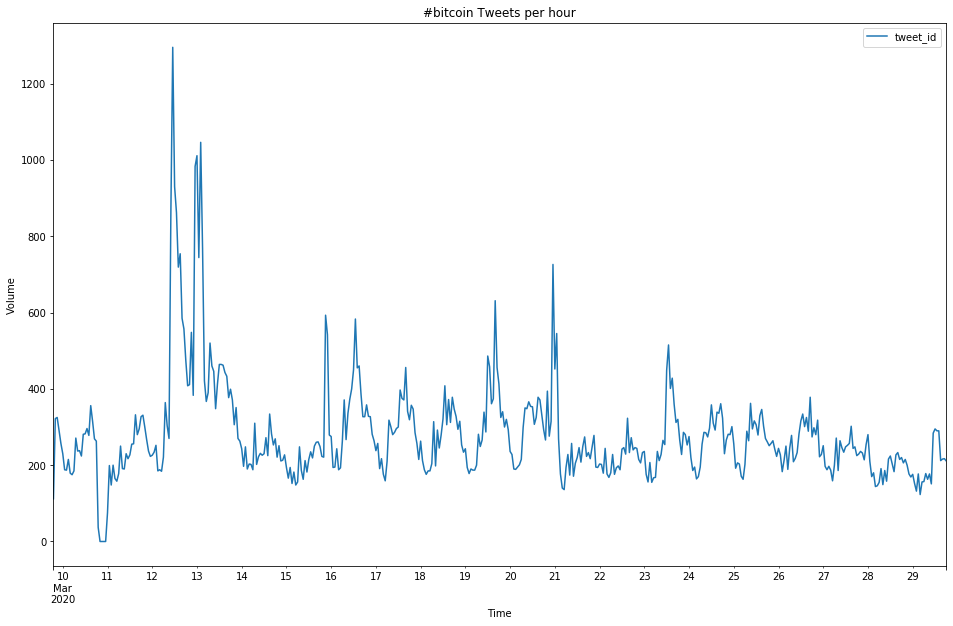

In [208]:
plot_start_date = '2020-03-01'

ax = hist.loc[plot_start_date:].plot()
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.set_title('#bitcoin Tweets per hour')

### Google Trends Data

In [109]:
from pytrends.request import TrendReq

In [110]:
focus_words = ['bitcoin']

pygt = TrendReq()
pygt.build_payload(kw_list=focus_words)

interest_over_time_df = pygt.interest_over_time()
del interest_over_time_df['isPartial']
interest_over_time_df.tail()

,bitcoin
date,
2020-02-23,11
2020-03-01,10
2020-03-08,19
2020-03-15,20
2020-03-22,16


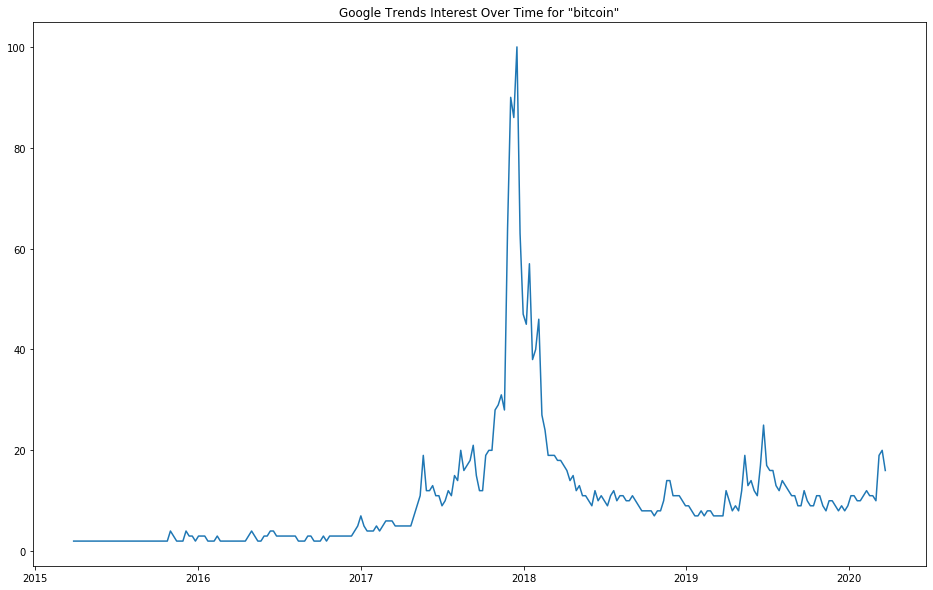

In [111]:
plot = plt.plot(interest_over_time_df)
plt.title('Google Trends Interest Over Time for "bitcoin"')
plt.show()

In [248]:
historical_hourly_interest_df = pygt.get_historical_interest(focus_words, year_start=2020, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=3, day_end=30, hour_end=0, cat=0, geo='', gprop='')
del historical_hourly_interest_df['isPartial']
historical_hourly_interest_df.head()

The request failed: Google returned a response with code 500.


,bitcoin
date,
2020-01-01 00:00:00,49
2020-01-01 01:00:00,46
2020-01-01 02:00:00,0
2020-01-01 03:00:00,0
2020-01-01 04:00:00,0


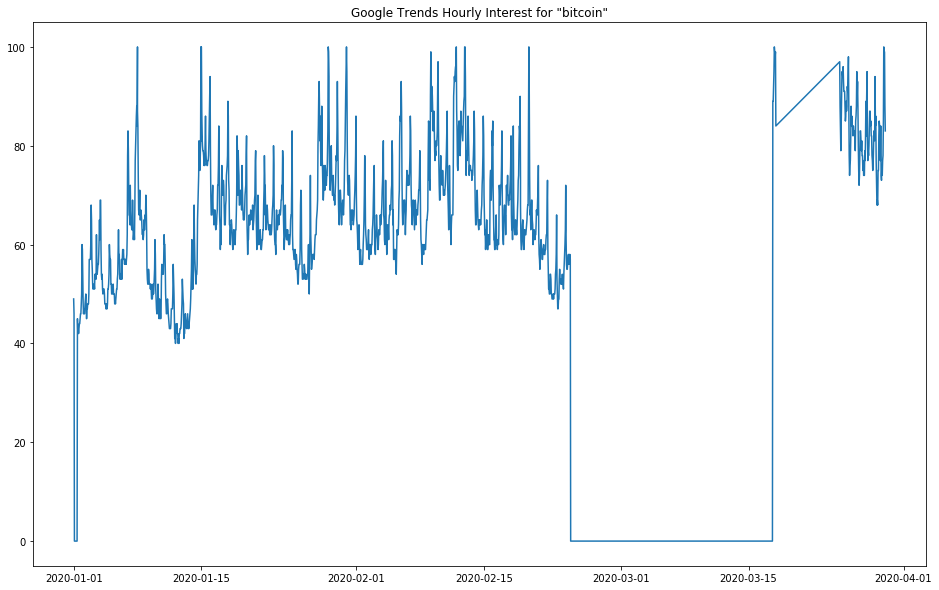

In [249]:
plot = plt.plot(historical_hourly_interest_df)
plt.title('Google Trends Hourly Interest for "bitcoin"')
plt.show()

Some issues with this data.

### Bitcoin price data

In [160]:
import requests
from io import StringIO

In [177]:
btc_cb_data = requests.get('http://www.cryptodatadownload.com/cdd/Coinbase_BTCUSD_1h.csv').content.decode()
btc_bn_data = requests.get('http://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_1h.csv').content.decode()

btc_cb_df = pd.read_csv(StringIO(btc_cb_data), skiprows=1)
btc_bn_df = pd.read_csv(StringIO(btc_bn_data), skiprows=1)

btc_cb_df['Date'] = pd.to_datetime(btc_cb_df['Date'], format='%Y-%m-%d %I-%p')
btc_bn_df['Date'] = pd.to_datetime(btc_bn_df['Date'], format='%Y-%m-%d %I-%p')

In [178]:
btc_cb_df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-01 11:00:00,BTCUSD,6298.05,6302.66,6282.00,6289.04,30.94,194652.72
1,2020-04-01 10:00:00,BTCUSD,6305.70,6325.36,6292.21,6298.05,270.91,1708390.93
2,2020-04-01 09:00:00,BTCUSD,6317.89,6323.87,6270.00,6305.70,335.43,2111440.38
3,2020-04-01 08:00:00,BTCUSD,6338.96,6338.96,6295.01,6317.89,286.39,1808072.52
4,2020-04-01 07:00:00,BTCUSD,6308.97,6347.74,6296.01,6338.96,373.15,2360674.30


Text(0.5, 0.98, 'Bitcoin Historical Hourly Price Data')

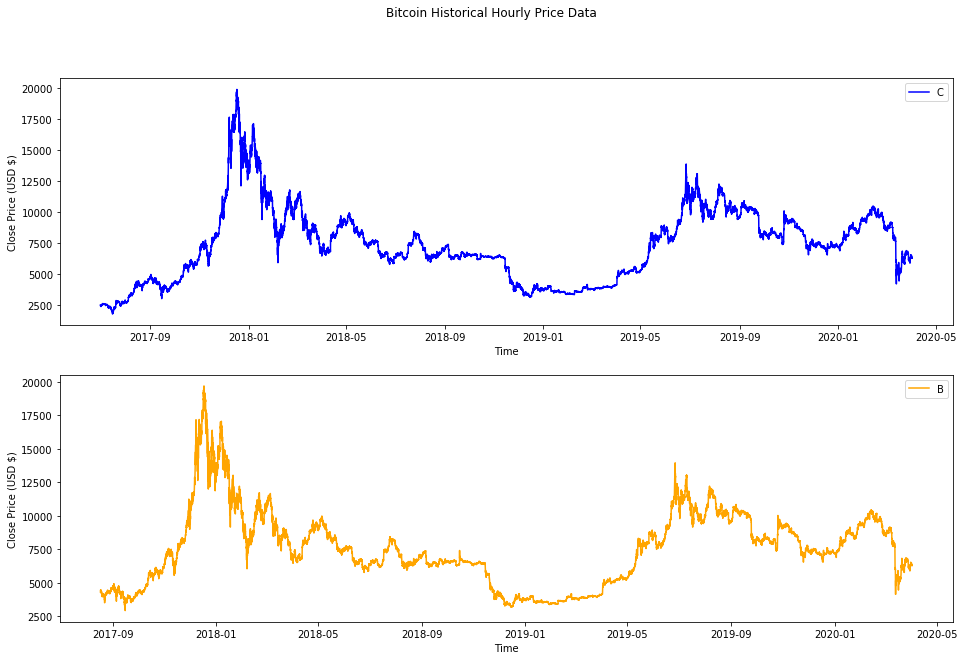

In [222]:
fig, ax =  plt.subplots(2,1)

ax[0].plot(btc_cb_df['Date'], btc_cb_df['Close'], color='blue')
ax[0].legend('Coinbase')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Close Price (USD $)')

ax[1].plot(btc_bn_df['Date'], btc_bn_df['Close'], color='orange')
ax[1].legend('Binance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Close Price (USD $)')

fig.suptitle('Bitcoin Historical Hourly Price Data')

### TO DO: Deribit volatility data
(waiting for calculator)

### Tweet sentiment time series

In [216]:
sentiment_time = tweet_grouped.mean()
sentiment_time.head()

,sentiment_rating
created,
2020-03-09 19:00:00+00:00,0.303571
2020-03-09 20:00:00+00:00,0.295031
2020-03-09 21:00:00+00:00,0.083077
2020-03-09 22:00:00+00:00,0.182759
2020-03-09 23:00:00+00:00,0.186770


Text(0, 0.5, 'Mean Sentiment Rating')

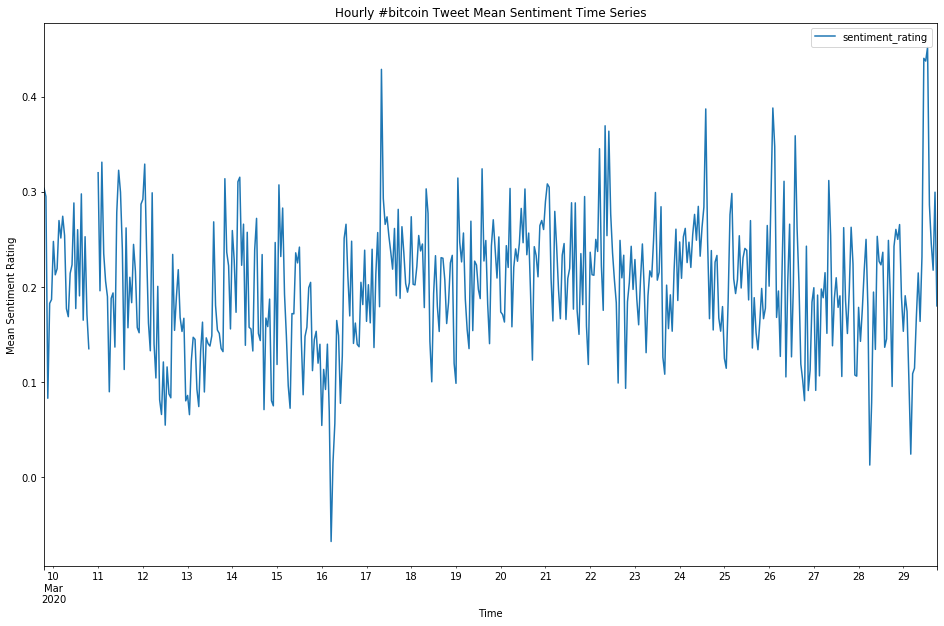

In [220]:
sentiment_time.plot()
plt.title('Hourly #bitcoin Tweet Mean Sentiment Time Series')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment Rating')

***

## Regression Models

Select a common time range where each series has clean data available:

In [242]:
start_date = '2020-03-05'
end_date = '2020-03-20'

series_btc = btc_cb_df.filter(['Date', 'Close']).set_index('Date').loc[start_date:end_date]
series_sentiment = sentiment_time.loc[start_date:end_date]
series_volume = tweet_volume.loc[start_date:end_date]
series_gtrends = historical_hourly_interest_df.loc[start_date:end_date]

In [247]:
series_gtrends

,bitcoin
date,
2020-03-05 00:00:00,51
2020-03-05 01:00:00,49
2020-03-05 02:00:00,51
2020-03-05 03:00:00,54
2020-03-05 04:00:00,55
...,...
2020-03-17 20:00:00,40
2020-03-17 21:00:00,40
2020-03-17 22:00:00,40


Plot narrowed down time series:

Text(0.5, 0.98, 'Time Series')

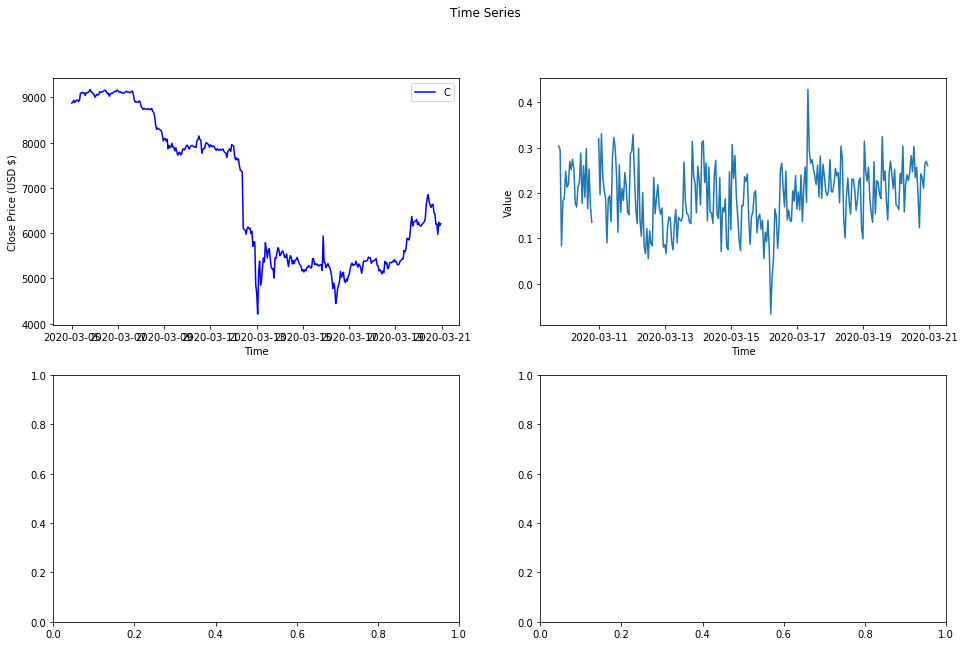

In [250]:
fig, ax =  plt.subplots(2,2)

ax[0][0].plot(series_btc, color='blue')
ax[0][0].legend('Coinbase')
ax[0][0].set_xlabel('Time')
ax[0][0].set_ylabel('Close Price (USD $)')

ax[0][1].plot(series_sentiment)
ax[0][1].set_xlabel('Time')
ax[0][1].set_ylabel('Value')

fig.suptitle('Time Series')

### Data needs cleaning!